# Predicting Pleasant Weather with Deep Learning

This project uses a convolutional neural network (CNN) to explore 60 years of European weather data and predict “pleasant days” across multiple stations. Building on ClimateWins’ historical observations, the goal is to structure the data and develop a deep learning model capable of capturing temporal and spatial patterns in the weather variables. This approach allows for more powerful pattern recognition than traditional methods, providing a foundation for improved forecasts and insights into long-term climate trends.

## Table of Contents  
- [1. Import Libraries](#1-import-libraries)  
- [2. Load Data](#2-load-data)
- [3. Wrangle Data](#3-wrangle-data)  
- [4. Reshape Data](#4-reshape-data)  
- [5. Split Data](#5-split-data)  
- [6. Build Keras Model](#6-build-keras-model)
  - Trial 1
- [7. Compile and Run Model](#7-compile-and-run-model)  
- [8. Evaluate Model](#8-evaluate-model)  
- [9. Model Retrials](#9-model-retrials)
  - Trial 2
  - Trial 3   

---

## 1. Import Libraries

In this step, I load all the Python packages required for this project:

- `pandas` and `numpy` for data handling and numerical operations
- `seaborn` and `matplotlib` for data visualisation
- `os` and `operator` for file handling and utility operations
- `tensorflow` and `keras` for building and training the neural network model
- `sklearn` tools (`train_test_split`, `LabelEncoder`) for preparing the data for machine learning

These libraries provide the foundation for preprocessing the data, defining and training the neural network, and evaluating its performance.

In [301]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

---

## 2. Load Data

In this step, I set the file path and imported two datasets into pandas: the full European weather dataset (Climate.csv) and the “pleasant weather” labels (pleasant_weather_answers.csv). Checking the shape of both datasets ensures they were loaded correctly and provides a quick overview of their dimensions before any further processing or analysis.

In [302]:
# Create a path to where my data is stored
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Specialisation'

In [303]:
# Read in the European weather data
climate = pd.read_csv(os.path.join(path, 'Achievement 1', '1.1', 'Climate.csv'))
prediction = pd.read_csv(os.path.join(path, 'Achievement 1', '1.4', 'pleasant_weather_answers.csv'))
climate

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.0180,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.0180,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.0180,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.0180,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,10,1,2.1,0.79,1.0248,1.34,0.22,0,7.7,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22946,20221028,10,6,2.1,0.77,1.0244,1.34,0.22,0,5.4,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22947,20221029,10,4,2.1,0.76,1.0227,1.34,0.22,0,6.1,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
22948,20221030,10,5,2.1,0.80,1.0212,1.34,0.22,0,5.8,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5


In [304]:
# Check climate shape
climate.shape

(22950, 170)

In [305]:
# Check prediction shape
prediction.shape

(22950, 16)

---

## 3. Wrangle Data

In this step, I cleaned and prepared the climate data for deep learning. I removed unnecessary columns like DATE and MONTH, dropped stations and observation types that were missing significant data, and ensured that only the stations included in the “pleasant weather” answers remained. Sparse observation types such as wind_speed and snow_depth were also removed. For a few missing observations, I filled in values using nearby stations to maintain completeness. Finally, the cleaned dataset was exported for use in model training.

In [306]:
# Drop 'DATE' and 'MONTH' from the dataset
climate = climate.drop(columns=['DATE', 'MONTH'])
prediction = prediction.drop(columns=['DATE']) 

# Confirm changes
climate.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [307]:
# Check climate shape
climate.shape

(22950, 168)

In [308]:
# Check prediction shape
prediction.shape 

(22950, 15)

In [309]:
# Get all station names from climate columns
stations = set(col.split('_')[0] for col in climate.columns)
print("Stations in climate:", sorted(stations))

Stations in climate: ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'GDANSK', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS', 'VALENTIA']


In [310]:
# Get all station names from prediction columns
prediction_stations = set(prediction.columns)
print("Stations in prediction:", sorted(prediction_stations))

Stations in prediction: ['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']


In [311]:
# Remove weather stations not included in "pleasant weather" answers
climate = climate.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [312]:
# Check climate shape
climate.shape

(22950, 147)

In [313]:
# Check prediction shape
prediction.shape 

(22950, 15)

In [314]:
# Define all observation types
observation_types = [
    'cloud_cover', 'wind_speed', 'humidity', 'pressure',
    'global_radiation', 'precipitation', 'snow_depth',
    'sunshine', 'temp_mean', 'temp_min', 'temp_max'
]

In [315]:
# Count how many stations have each observation type 
# Dictionary to count how many stations contain each observation type
station_counts = {}

for obs in observation_types:
    obs_cols = [col for col in climate.columns if col.endswith(obs)]
    station_counts[obs] = len(obs_cols)

# Print the results
for obs, count in station_counts.items():
    print(f"{obs}: {count} stations")

cloud_cover: 14 stations
wind_speed: 9 stations
humidity: 14 stations
pressure: 14 stations
global_radiation: 15 stations
precipitation: 15 stations
snow_depth: 6 stations
sunshine: 15 stations
temp_mean: 15 stations
temp_min: 15 stations
temp_max: 15 stations


In [316]:
# Drop sparse observation types ---> wind_speed & snow_depth
columns_to_drop = [col for col in climate.columns if '_wind_speed' in col or '_snow_depth' in col]
climate = climate.drop(columns=columns_to_drop)

In [317]:
# Check shape
climate.shape

(22950, 132)

In [318]:
# Detect missing columns
# Get current station names
stations = set([col.split('_')[0] for col in climate.columns])

# Define expected observation types
observation_types = ['cloud_cover', 'humidity', 'pressure', 'global_radiation', 
                     'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']

# Build all expected column names
expected_columns = set()
for station in stations:
    for obs in observation_types:
        expected_columns.add(f'{station}_{obs}')

# Compare with actual columns
actual_columns = set(climate.columns)

# Find which columns are missing
missing_columns = expected_columns - actual_columns
print("Missing columns:")
for col in sorted(missing_columns):
    print(col)

Missing columns:
KASSEL_cloud_cover
MUNCHENB_pressure
STOCKHOLM_humidity


In [319]:
# Fill missing columns with values from nearby stations (correct direction)
climate['KASSEL_cloud_cover'] = climate['LJUBLJANA_cloud_cover']
climate['MUNCHENB_pressure'] = climate['SONNBLICK_pressure']
climate['STOCKHOLM_humidity'] = climate['OSLO_humidity']

In [320]:
# Confirm that no missing columns remain
print("Missing columns after filling:")
remaining_missing = expected_columns - set(climate.columns)
print(remaining_missing)  # Should be an empty set

# Also check for NaN values
print("Top missing values by column:")
print(climate.isnull().sum().sort_values(ascending=False).head(10))

Missing columns after filling:
set()
Top missing values by column:
BASEL_cloud_cover         0
MADRID_sunshine           0
OSLO_pressure             0
OSLO_humidity             0
OSLO_cloud_cover          0
MUNCHENB_temp_max         0
MUNCHENB_temp_min         0
MUNCHENB_temp_mean        0
MUNCHENB_sunshine         0
MUNCHENB_precipitation    0
dtype: int64


In [321]:
# Check climate shape
climate.shape

(22950, 135)

In [322]:
# Check prediction shape
prediction.shape

(22950, 15)

In [323]:
# Export cleaned dataset
climate.to_csv(os.path.join(path, 'Achievement 2', '2.2','weather_cleaned.csv'), index=False)

---

## 4. Reshape Data

In this step, I prepared the cleaned climate data (X) and labels (y) for input into the deep learning model. After loading both datasets and converting them to NumPy arrays, X was reshaped into a 3D array with the shape (samples, 15 stations, 9 observation types) to match the expected input format for a CNN or RNN. The labels y remained a 2D array with one row per sample and one column per station. This reshaping ensures the model can correctly process temporal and spatial patterns across stations.

In [324]:
# Load cleaned data into X
X = pd.read_csv(os.path.join(path, 'Achievement 2', '2.2', 'weather_cleaned.csv'), index_col=False)

# Load your labels
y = prediction

In [325]:
# Check X
X.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,KASSEL_cloud_cover,MUNCHENB_pressure,STOCKHOLM_humidity
0,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,10.9,1,...,1.0003,0.45,0.34,4.7,8.5,6.0,10.9,8,1.0304,0.98
1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,10.1,6,...,1.0007,0.25,0.84,0.7,8.9,5.6,12.1,6,1.0292,0.62
2,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,9.9,6,...,1.0096,0.17,0.08,0.1,10.5,8.1,12.9,8,1.0320,0.69
3,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,10.6,8,...,1.0184,0.13,0.98,0.0,7.4,7.3,10.6,6,1.0443,0.98
4,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,6.0,8,...,1.0328,0.46,0.00,5.7,5.7,3.0,8.4,7,1.0430,0.96


In [326]:
# Confirm the current shapes
print("X shape (before reshaping):", X.shape)
print("y shape:", y.shape)

X shape (before reshaping): (22950, 135)
y shape: (22950, 15)


In [327]:
# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)
X

array([[7.    , 0.85  , 1.018 , ..., 8.    , 1.0304, 0.98  ],
       [6.    , 0.84  , 1.018 , ..., 6.    , 1.0292, 0.62  ],
       [8.    , 0.9   , 1.018 , ..., 8.    , 1.032 , 0.69  ],
       ...,
       [4.    , 0.76  , 1.0227, ..., 3.    , 1.0263, 0.85  ],
       [5.    , 0.8   , 1.0212, ..., 3.    , 1.0263, 0.94  ],
       [5.    , 0.84  , 1.0193, ..., 3.    , 1.0263, 0.97  ]])

In [328]:
# Reshape X to 3D
X = X.reshape(-1, 15, 9)  # -1 tells NumPy to figure out the number of smaples automatically based on the other dimensions

In [329]:
# Confirm the final shape 
print("Final X shape:", X.shape)  # should be (22950, 15, 9)
print("Final y shape:", y.shape)  # should be (22950, 15)

Final X shape: (22950, 15, 9)
Final y shape: (22950, 15)


In [330]:
# Confirm X
X

array([[[ 7.0000e+00,  8.5000e-01,  1.0180e+00, ...,  6.5000e+00,
          8.0000e-01,  1.0900e+01],
        [ 1.0000e+00,  8.1000e-01,  1.0195e+00, ...,  3.7000e+00,
         -9.0000e-01,  7.9000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.4000e+00,
         -4.0000e-01,  5.1000e+00],
        ...,
        [ 1.0304e+00,  4.8000e-01,  1.0000e-02, ..., -3.2000e+00,
          5.0000e+00,  1.0114e+00],
        [ 5.0000e-02,  3.2000e-01,  0.0000e+00, ...,  5.0000e+00,
          8.8000e-01,  1.0003e+00],
        [ 4.5000e-01,  3.4000e-01,  4.7000e+00, ...,  8.0000e+00,
          1.0304e+00,  9.8000e-01]],

       [[ 6.0000e+00,  8.4000e-01,  1.0180e+00, ...,  6.1000e+00,
          3.3000e+00,  1.0100e+01],
        [ 6.0000e+00,  8.4000e-01,  1.0172e+00, ...,  2.9000e+00,
          2.2000e+00,  4.4000e+00],
        [ 4.0000e+00,  6.7000e-01,  1.0170e+00, ...,  2.3000e+00,
          1.4000e+00,  3.1000e+00],
        ...,
        [ 1.0292e+00,  2.1000e-01,  6.1000e-01, ..., -

---

## 5. Split Data

In this step, the dataset was divided into training and testing sets using a standard 75/25 split. X_train and y_train will be used to train the deep learning model, while X_test and y_test will be reserved for evaluating its performance. Splitting the data in this way ensures the model is tested on unseen data, providing a reliable measure of how well it generalises to new weather observations.

In [331]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [332]:
# Check shapes
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (17212, 15, 9) (17212, 15)
Testing set: (5738, 15, 9) (5738, 15)


---

## 6. Build Keras Model

In this step, a Convolutional Neural Network (CNN) was constructed using Keras to predict “pleasant weather” for multiple stations. The model starts with smaller values for testing purposes: 5 epochs, a batch size of 16, and 8 hidden units.

The architecture includes:
- A 1D convolution layer to capture patterns across the 15 stations for the 9 observation types per station
- A small dense layer to learn higher-level feature interactions
- A max pooling layer to reduce dimensionality and improve generalisation
- A flatten layer to convert the 2D output into a 1D vector
- A final dense layer with softmax activation to classify each station’s weather into 15 possible categories

This setup provides a simple, testable starting point before experimenting with larger networks or additional layers.

### **Trial 1**

In [333]:
# Define key parameters ---> start with small values to test model behaviour
epochs = 5              # Start small; increase after testing
batch_size = 16         # Reasonable size for small datasets
n_hidden = 8            # Small hidden layer to begin with (instead of 32)

In [334]:
# Define dimensions
timesteps = len(X_train[0])         # 15 weather stations
input_dim = len(X_train[0][0])      # 9 observation types per station
n_classes = len(y_train[0])         # 15 output classes (stations)

In [335]:
# Build the model
model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(8, activation='relu'))           # Smaller dense layer to start with
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))  # Output layer: softmax for multi-class classification

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [336]:
# Show model architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)              │ (None, 14, 8)          │           152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 14, 8)          │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_12 (MaxPooling1D) │ (None, 7, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 15)             │           855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,079 (4.21 KB)

 Trainable params: 1,079 (4.21 KB)

 Non-trainable params: 0 (0.00 B)

---

## 7. Compile & Run Model

In this step, the CNN model was compiled and trained.

- Compilation: The model uses categorical cross-entropy as the loss function because it’s a multi-class classification problem. The Adam optimizer was chosen for its efficiency and ability to adapt learning rates, and accuracy is tracked as the performance metric.
- Training: The model is trained on the training dataset (X_train, y_train) for 5 epochs with a batch size of 16. Validation is performed using the test set (X_test, y_test) to monitor performance on unseen data.
- Evaluation: After training, the history object is examined to track how the training and validation loss and accuracy evolved across epochs. This provides insight into whether the model is learning effectively and if any overfitting is occurring.

### **Trial 1**

In [337]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',   # For multi-class classification
    optimizer='adam',                  # Popular and effective optimizer
    metrics=['accuracy']               # Track accuracy during training
)

In [338]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=5,             # Start small to test
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1             # Shows training progress
)


Epoch 1/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1414 - loss: 1266.0677 - val_accuracy: 0.2321 - val_loss: 3838.2141
Epoch 2/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1466 - loss: 12361.7549 - val_accuracy: 0.1617 - val_loss: 21984.7695
Epoch 3/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1495 - loss: 40853.9258 - val_accuracy: 0.2971 - val_loss: 54569.9219
Epoch 4/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1441 - loss: 86181.6250 - val_accuracy: 0.1363 - val_loss: 108308.0312
Epoch 5/5
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1390 - loss: 154616.8125 - val_accuracy: 0.0915 - val_loss: 180960.6875


In [339]:
# After training, examine history for loss and accuracy trends
print("Training loss over epochs:", history.history['loss'])
print("Training accuracy over epochs:", history.history['accuracy'])
print("Validation loss over epochs:", history.history['val_loss'])
print("Validation accuracy over epochs:", history.history['val_accuracy'])

Training loss over epochs: [1266.0677490234375, 12361.7548828125, 40853.92578125, 86181.625, 154616.8125]
Training accuracy over epochs: [0.14135487377643585, 0.14664188027381897, 0.14954683184623718, 0.14414362609386444, 0.13897280395030975]
Validation loss over epochs: [3838.214111328125, 21984.76953125, 54569.921875, 108308.03125, 180960.6875]
Validation accuracy over epochs: [0.23213663697242737, 0.16172882914543152, 0.2971418499946594, 0.13628442585468292, 0.09149529784917831]


---

## 8. Evaluate Model 

In this step, the model’s predictions are evaluated and visualised:

- Mapping Predictions to Stations: Since the model outputs one-hot encoded labels, these are converted back to station names for easier interpretation.
- Confusion Matrix: A confusion matrix is plotted to compare predicted vs. true stations. This highlights where the model performs well and where it misclassifies, providing insight into strengths and weaknesses. Both a starting (random guess) and final model confusion matrix are displayed to illustrate improvements after training.
- Recognition of All Stations: The model is checked to ensure it recognises all 15 stations. Missing predictions are reported if any station is not identified.
- Accuracy Calculation: The overall accuracy is calculated by comparing predicted and true station labels, giving a single metric to summarise model performance.
- Export: Both confusion matrices are saved to a PDF for record-keeping and easy comparison.

This step ensures the model’s performance is transparent, measurable, and reproducible.

### **Trial 1**

In [340]:
# Station names mapping
stations = {
    0: 'BASEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
    10: 'MUNCHENB',
    11: 'OSLO',
    12: 'SONNBLICK',
    13: 'STOCKHOLM',
    14: 'VALENTIA'
}

In [341]:
# Convert one-hot to station labels
def get_station_labels(one_hot_labels):
    indices = np.argmax(one_hot_labels, axis=1)
    return [stations[i] for i in indices]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step


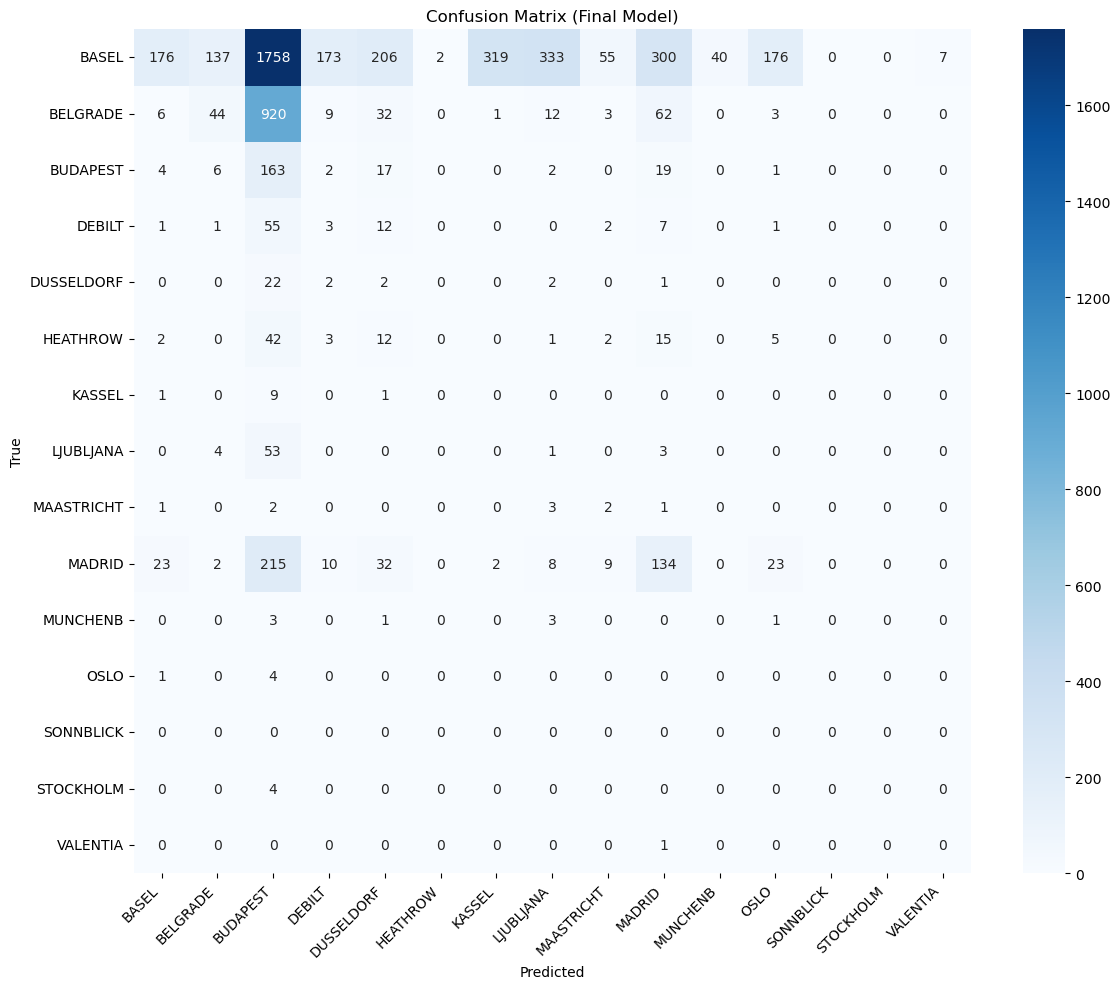

In [342]:
# Plot and show confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    
    # Create confusion matrix DataFrame
    cm_df = pd.crosstab(pd.Series(y_true, name='True'),
                        pd.Series(y_pred, name='Predicted'),
                        dropna=False)

    # Ensure all stations appear as rows/cols even if missing
    cm_df = cm_df.reindex(index=stations.values(), columns=stations.values(), fill_value=0)

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)

    ax.set_title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.show() 
    return fig

# Convert one-hot to labels
y_true_labels = get_station_labels(y_test)
y_pred_labels = get_station_labels(model.predict(X_test))

# Plot confusion matrix
_ = plot_confusion_matrix(y_true_labels, y_pred_labels, "Confusion Matrix (Final Model)")

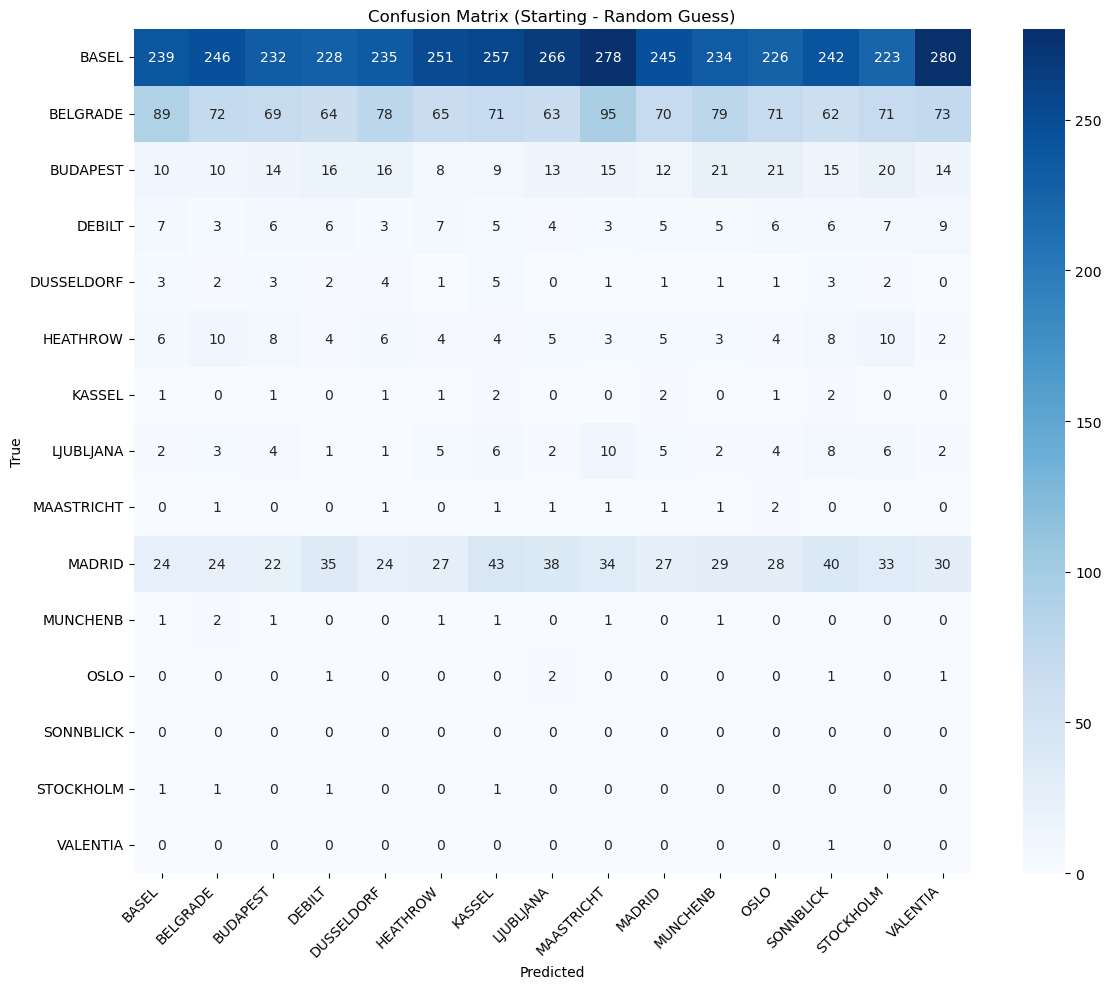

In [343]:
# Simulate random predictions for starting confusion matrix
random_indices = np.random.choice(list(stations.keys()), size=len(y_test))
y_pred_start_labels = [stations[i] for i in random_indices]

# Plot starting confusion matrix (avoid double plotting)
_ = plot_confusion_matrix(y_true_labels, y_pred_start_labels, "Confusion Matrix (Starting - Random Guess)")

In [344]:
# Check if the model recognises all 15 stations 
predicted_stations = set(y_pred_labels)
all_stations = set(stations.values())

if all_stations.issubset(predicted_stations):
    print("The model recognized all 15 stations.")
else:
    missing = all_stations - predicted_stations
    print(f"The model did NOT recognize all stations. Missing: {missing}")

The model did NOT recognize all stations. Missing: {'STOCKHOLM', 'SONNBLICK'}


In [345]:
from sklearn.metrics import accuracy_score

# Calculate model accuracy
# Convert true and predicted labels back to class indices
true_indices = np.argmax(y_test, axis=1)
pred_indices = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_indices, pred_indices)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step
Model Accuracy: 9.15%


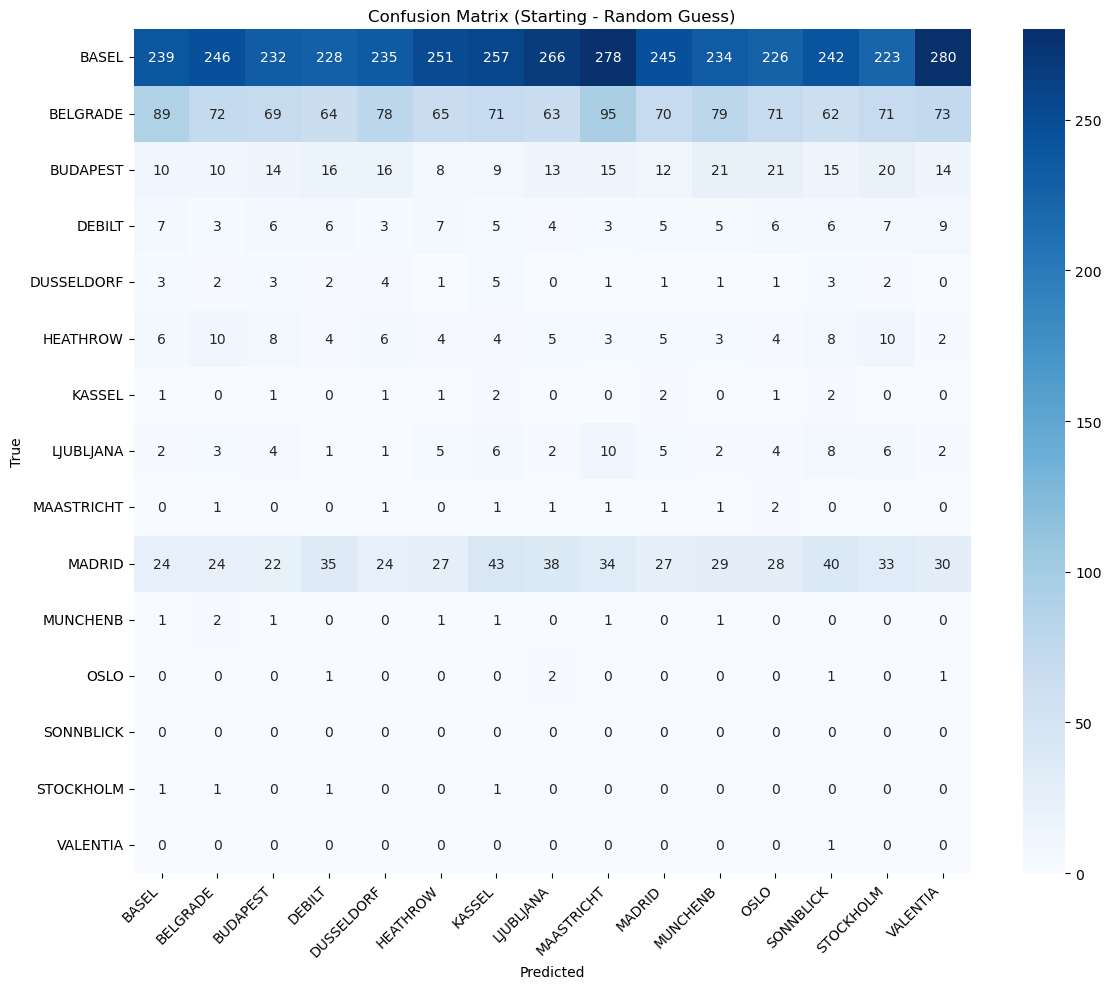

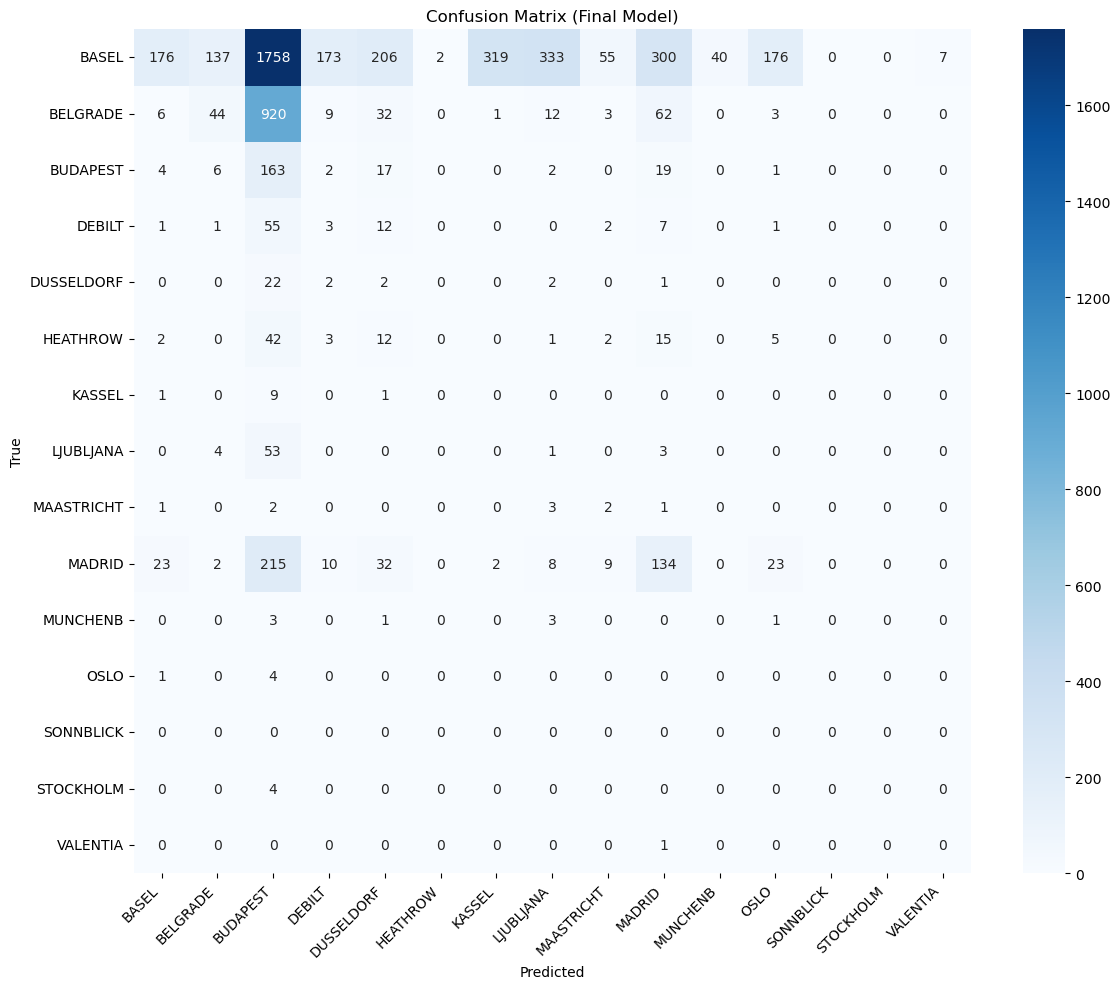

📝 Saved both confusion matrices to 'confusion_matrices.pdf'


In [346]:
# Save both confusion matrcies in one document
from matplotlib.backends.backend_pdf import PdfPages

# Generate both figures again (or reuse if saved)
fig_start = plot_confusion_matrix(y_true_labels, y_pred_start_labels, "Confusion Matrix (Starting - Random Guess)")
fig_final = plot_confusion_matrix(y_true_labels, y_pred_labels, "Confusion Matrix (Final Model)")

# Save to PDF
with PdfPages("confusion_matrices.pdf") as pdf:
    pdf.savefig(fig_start)
    pdf.savefig(fig_final)

print("📝 Saved both confusion matrices to 'confusion_matrices.pdf'")

---

## 9. Model Retrials

After the initial model, additional retrials were conducted to improve performance and test different hyperparameter configurations. These retrials included adjustments to:

- Number of epochs – allowing the model more iterations to learn patterns
- Hidden layer size (n_hidden) – increasing or decreasing neurons to see the effect on learning capacity
- Batch size – experimenting with larger or smaller batches for stability and convergence
- Layer architecture – adding or removing layers such as additional Dense, Conv1D, or Pooling layers

Each retrial’s training history was monitored for changes in loss and accuracy, and confusion matrices were plotted to visualise performance improvements.

This iterative approach ensures the model is gradually refined and better able to recognise all 15 stations.

### **Trial 2**

In [347]:
# Define key parameters for improved model
epochs = 30              # Increase epochs for better learning
batch_size = 16          # Keep batch size reasonable
n_hidden = 32            # Increase hidden layer size based on previous results

In [348]:
# Define dimensions (keep as before)
timesteps = len(X_train[0])         # 15 time steps (stations)
input_dim = len(X_train[0][0])      # 9 features per timestep
n_classes = len(y_train[0])         # 15 stations

In [349]:
# Build model
model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(8, activation='relu'))           # Smaller dense layer after conv
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))  # Output layer: softmax for multi-class classification

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [350]:
# Show model architecture
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_13 (Conv1D)              │ (None, 14, 32)         │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 14, 8)          │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_13 (MaxPooling1D) │ (None, 7, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 15)             │           855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,727 (6.75 KB)

 Trainable params: 1,727 (6.75 KB)

 Non-trainable params: 0 (0.00 B)

### **Compile & Run Model**

In [351]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [352]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1058 - loss: 4045.2676 - val_accuracy: 0.2142 - val_loss: 14689.9082
Epoch 2/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1238 - loss: 39338.9531 - val_accuracy: 0.1131 - val_loss: 66420.1484
Epoch 3/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1273 - loss: 122024.8281 - val_accuracy: 0.1384 - val_loss: 176306.9688
Epoch 4/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1348 - loss: 265929.0000 - val_accuracy: 0.1598 - val_loss: 338595.8125
Epoch 5/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1348 - loss: 480610.9688 - val_accuracy: 0.1046 - val_loss: 552676.1875
Epoch 6/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1343 - loss: 749638.6875 - val_accuracy: 0.2409 - val_loss: 849660.8125
Epoch 7/30
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1298 - loss: 1108540.6250 - val_accuracy: 0.1039 - val_loss: 1214760.5000
Epoch 8/30
1076/1076 ━━

In [353]:
# Print training history
print("Training loss over epochs:", history.history['loss'])
print("Training accuracy over epochs:", history.history['accuracy'])
print("Validation loss over epochs:", history.history['val_loss'])
print("Validation accuracy over epochs:", history.history['val_accuracy'])

Training loss over epochs: [4045.267578125, 39338.953125, 122024.828125, 265929.0, 480610.96875, 749638.6875, 1108540.625, 1534140.25, 2069387.375, 2621316.0, 3300527.5, 4070323.5, 4932608.0, 5866342.0, 6889095.5, 8043191.5, 9256482.0, 10579538.0, 12030875.0, 13605297.0, 15299558.0, 17087696.0, 18986990.0, 21166404.0, 23350542.0, 25668788.0, 28131624.0, 30878572.0, 33669876.0, 36649704.0]
Training accuracy over epochs: [0.10579828172922134, 0.12375087291002274, 0.12729491293430328, 0.13478967547416687, 0.13484777510166168, 0.13432489335536957, 0.1297931671142578, 0.13054844737052917, 0.13182663917541504, 0.12665581703186035, 0.12932837009429932, 0.12886358797550201, 0.13014176487922668, 0.12723681330680847, 0.12746921181678772, 0.12985126674175262, 0.12990936636924744, 0.1283406913280487, 0.12363467365503311, 0.12665581703186035, 0.1283406913280487, 0.1249709501862526, 0.1249709501862526, 0.1268882155418396, 0.1274111121892929, 0.12136881053447723, 0.12700441479682922, 0.12311178445816

### **Confusion Matrix**

In [354]:
# Station names mapping
stations = {
    0: 'BASEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
    10: 'MUNCHENB',
    11: 'OSLO',
    12: 'SONNBLICK',
    13: 'STOCKHOLM',
    14: 'VALENTIA'
}

station_names = list(stations.values())  # For reindexing

In [355]:
# Convert one-hot to station labels
def get_station_labels(one_hot_labels):
    indices = np.argmax(one_hot_labels, axis=1)
    return [stations[i] for i in indices]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


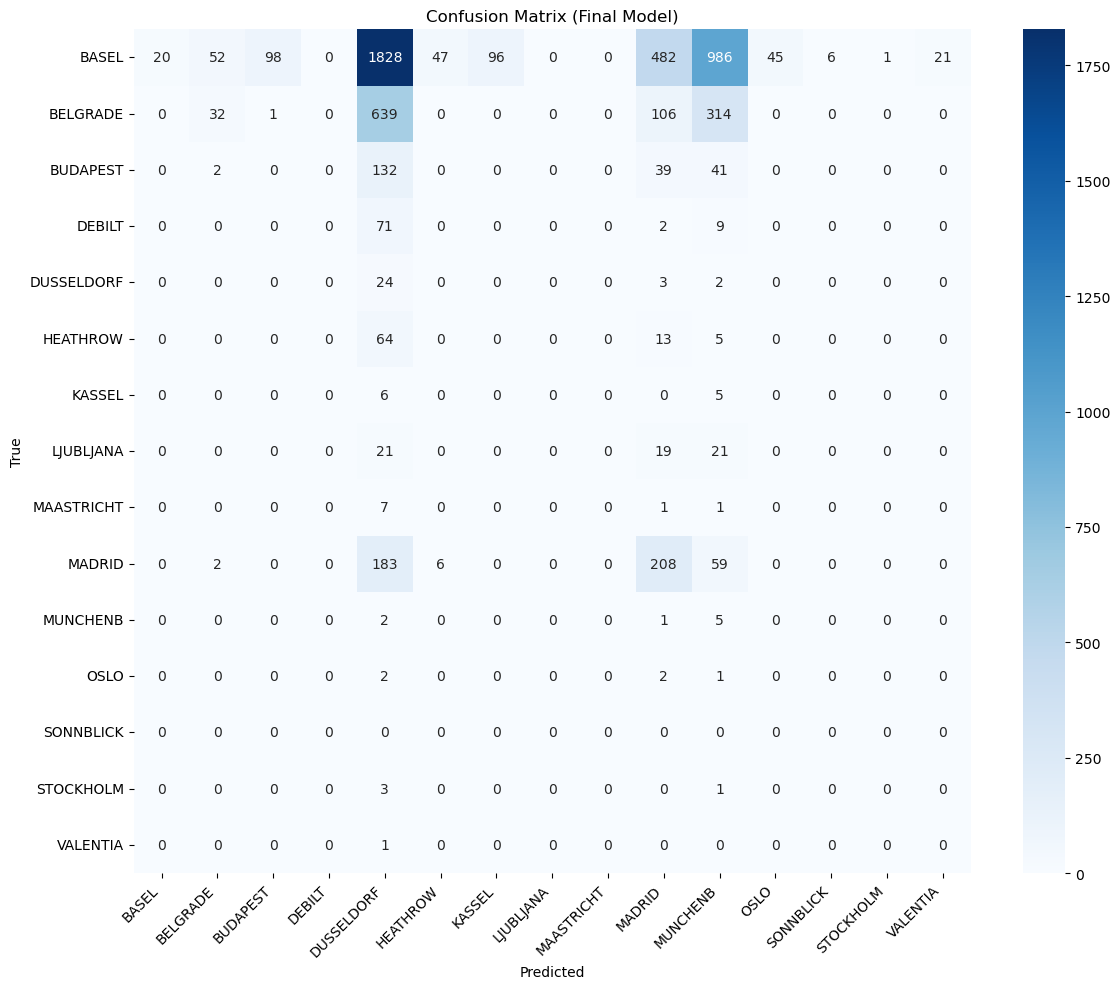

In [356]:
# Plot and show confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    # Create confusion matrix DataFrame
    cm_df = pd.crosstab(pd.Series(y_true, name='True'),
                        pd.Series(y_pred, name='Predicted'),
                        dropna=False)

    # Ensure all stations appear as rows/cols even if missing
    cm_df = cm_df.reindex(index=stations.values(), columns=stations.values(), fill_value=0)

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)

    ax.set_title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.show() 
    return fig

# Convert one-hot to labels
y_true_labels = get_station_labels(y_test)
y_pred_labels = get_station_labels(model.predict(X_test))

# Plot confusion matrix (avoid double plotting)
_ = plot_confusion_matrix(y_true_labels, y_pred_labels, "Confusion Matrix (Final Model)")

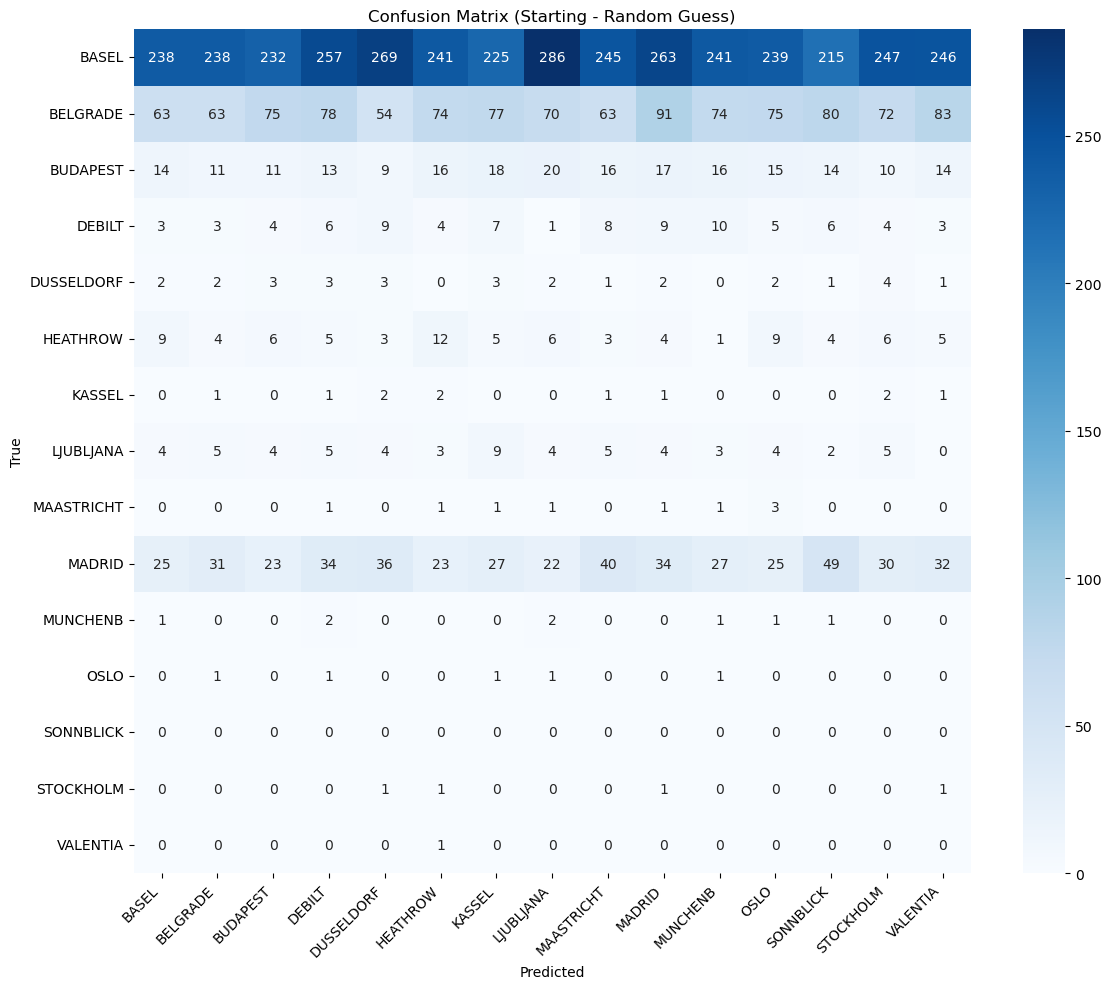

In [357]:
# Simulate random predictions for starting confusion matrix
random_indices = np.random.choice(list(stations.keys()), size=len(y_test))
y_pred_start_labels = [stations[i] for i in random_indices]

# Plot starting confusion matrix (avoid double plotting)
_ = plot_confusion_matrix(y_true_labels, y_pred_start_labels, "Confusion Matrix (Starting - Random Guess)")

In [358]:
# Check if the model recognises all 15 stations 
predicted_stations = set(y_pred_labels)
all_stations = set(stations.values())

if all_stations.issubset(predicted_stations):
    print("The model recognized all 15 stations.")
else:
    missing = all_stations - predicted_stations
    print(f"The model did NOT recognize all stations. Missing: {missing}")

The model did NOT recognize all stations. Missing: {'DEBILT', 'LJUBLJANA', 'MAASTRICHT'}


In [359]:
from sklearn.metrics import accuracy_score

# Calculate model accuracy
# Convert true and predicted labels back to class indices
true_indices = np.argmax(y_test, axis=1)
pred_indices = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_indices, pred_indices)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step
Model Accuracy: 5.04%


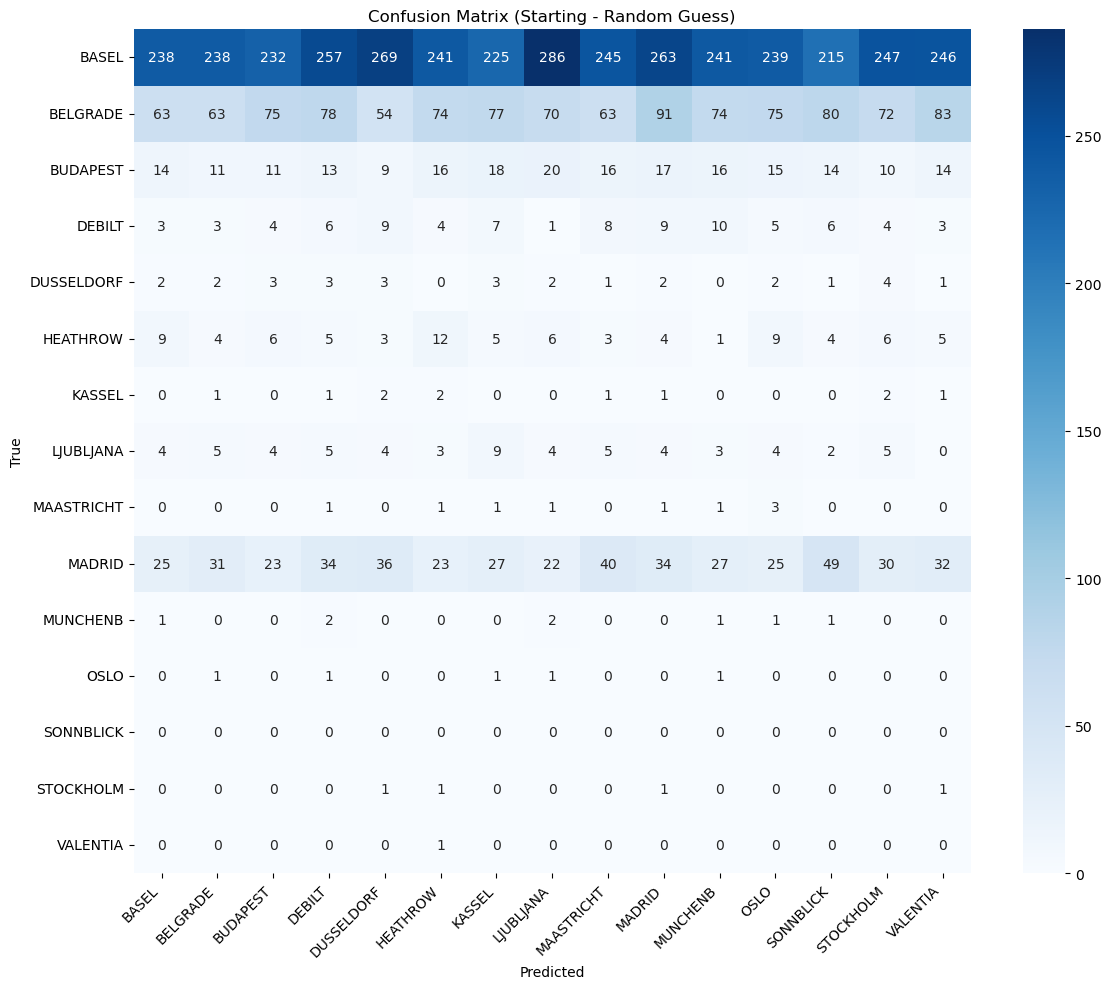

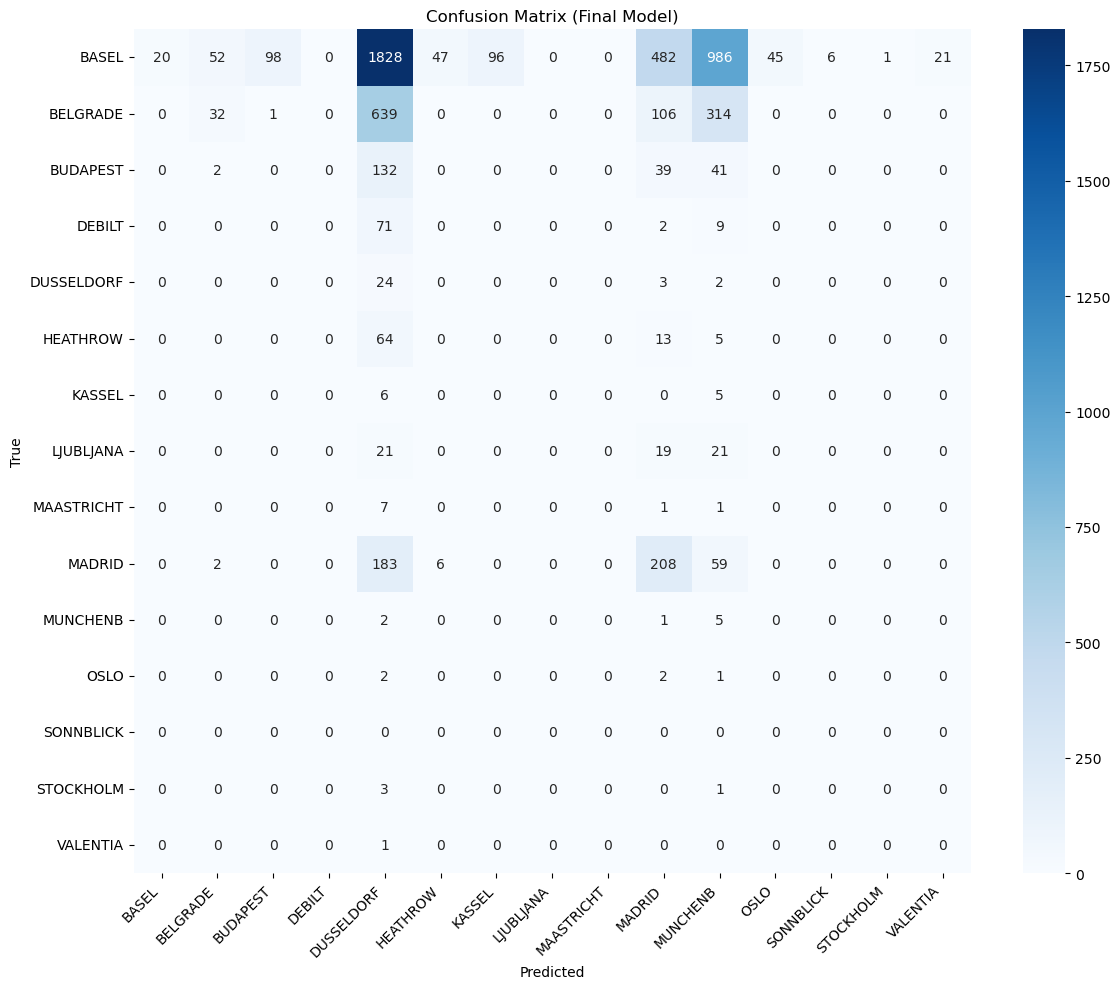

📝 Saved both confusion matrices to 'confusion_matrices_trial2.pdf'


In [360]:
from matplotlib.backends.backend_pdf import PdfPages

# Generate both figures again (avoid double plotting)
fig_start = plot_confusion_matrix(y_true_labels, y_pred_start_labels, "Confusion Matrix (Starting - Random Guess)")
fig_final = plot_confusion_matrix(y_true_labels, y_pred_labels, "Confusion Matrix (Final Model)")

# Save to a new PDF file for this trial
with PdfPages("confusion_matrices_trial2.pdf") as pdf:
    pdf.savefig(fig_start)
    pdf.savefig(fig_final)

print("📝 Saved both confusion matrices to 'confusion_matrices_trial2.pdf'")

### **Trial 3**

In [361]:
# Define key parameters
epochs = 50             # Increase further to allow more learning
batch_size = 8          # Smaller batch size may help model generalise better
n_hidden = 64           # Increase model capacity to learn more complex patterns

In [362]:
# Build model
model = Sequential()
model.add(Conv1D(n_hidden, kernel_size=2, activation='relu', input_shape=(timesteps, input_dim)))
model.add(Dense(8, activation='relu'))           # Smaller dense layer after conv
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))  # Output layer: softmax for multi-class classification

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [363]:
# Show model architecture
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_14 (Conv1D)              │ (None, 14, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 14, 8)          │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_14 (MaxPooling1D) │ (None, 7, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 56)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 15)             │           855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,591 (10.12 KB)

 Trainable params: 2,591 (10.12 KB)

 Non-trainable params: 0 (0.00 B)

### **Compile & Run the Model**

In [364]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [365]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1204 - loss: 57953.4180 - val_accuracy: 0.0955 - val_loss: 177353.5312
Epoch 2/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1218 - loss: 579714.8750 - val_accuracy: 0.2062 - val_loss: 986685.0625
Epoch 3/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1177 - loss: 1830556.3750 - val_accuracy: 0.1957 - val_loss: 2525237.2500
Epoch 4/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1240 - loss: 3882455.2500 - val_accuracy: 0.0406 - val_loss: 4776302.5000
Epoch 5/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1221 - loss: 6867038.5000 - val_accuracy: 0.1009 - val_loss: 7995113.5000
Epoch 6/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1219 - loss: 10929442.0000 - val_accuracy: 0.0289 - val_loss: 12367472.0000
Epoch 7/50
2152/2152 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1245 - loss: 16404688.0000 - val_accuracy: 0.1399 - val_loss: 17929178.0000
Epoch 8

In [366]:
# Print training history
print("Training loss over epochs:", history.history['loss'])
print("Training accuracy over epochs:", history.history['accuracy'])
print("Validation loss over epochs:", history.history['val_loss'])
print("Validation accuracy over epochs:", history.history['val_accuracy'])

Training loss over epochs: [57953.41796875, 579714.875, 1830556.375, 3882455.25, 6867038.5, 10929442.0, 16404688.0, 23286850.0, 31293902.0, 41643760.0, 53448124.0, 67005360.0, 83272144.0, 101533008.0, 122251040.0, 146217024.0, 172514704.0, 201111312.0, 234306608.0, 268599776.0, 309054848.0, 349452992.0, 395182080.0, 444598272.0, 499962144.0, 556852352.0, 619043392.0, 685511616.0, 754959104.0, 833662272.0, 909434944.0, 997557056.0, 1084337536.0, 1176884864.0, 1279681280.0, 1387585792.0, 1492786944.0, 1612215936.0, 1730268032.0, 1863262464.0, 2005687168.0, 2144800640.0, 2289109504.0, 2446347520.0, 2606197504.0, 2778345216.0, 2963347968.0, 3147560448.0, 3340192256.0, 3537980160.0]
Training accuracy over epochs: [0.12038113176822662, 0.12177550792694092, 0.11770857870578766, 0.12398326396942139, 0.12206599861383438, 0.12189170718193054, 0.1245061606168747, 0.12107831984758377, 0.12125261127948761, 0.1226469874382019, 0.1240413635969162, 0.1217174082994461, 0.12723681330680847, 0.1228793859

### **Confusion Matrix**

In [367]:
# Station names mapping
stations = {
    0: 'BASEL',
    1: 'BELGRADE',
    2: 'BUDAPEST',
    3: 'DEBILT',
    4: 'DUSSELDORF',
    5: 'HEATHROW',
    6: 'KASSEL',
    7: 'LJUBLJANA',
    8: 'MAASTRICHT',
    9: 'MADRID',
    10: 'MUNCHENB',
    11: 'OSLO',
    12: 'SONNBLICK',
    13: 'STOCKHOLM',
    14: 'VALENTIA'
}

In [368]:
# Convert one-hot to station labels
def get_station_labels(one_hot_labels):
    indices = np.argmax(one_hot_labels, axis=1)
    return [stations[i] for i in indices]

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


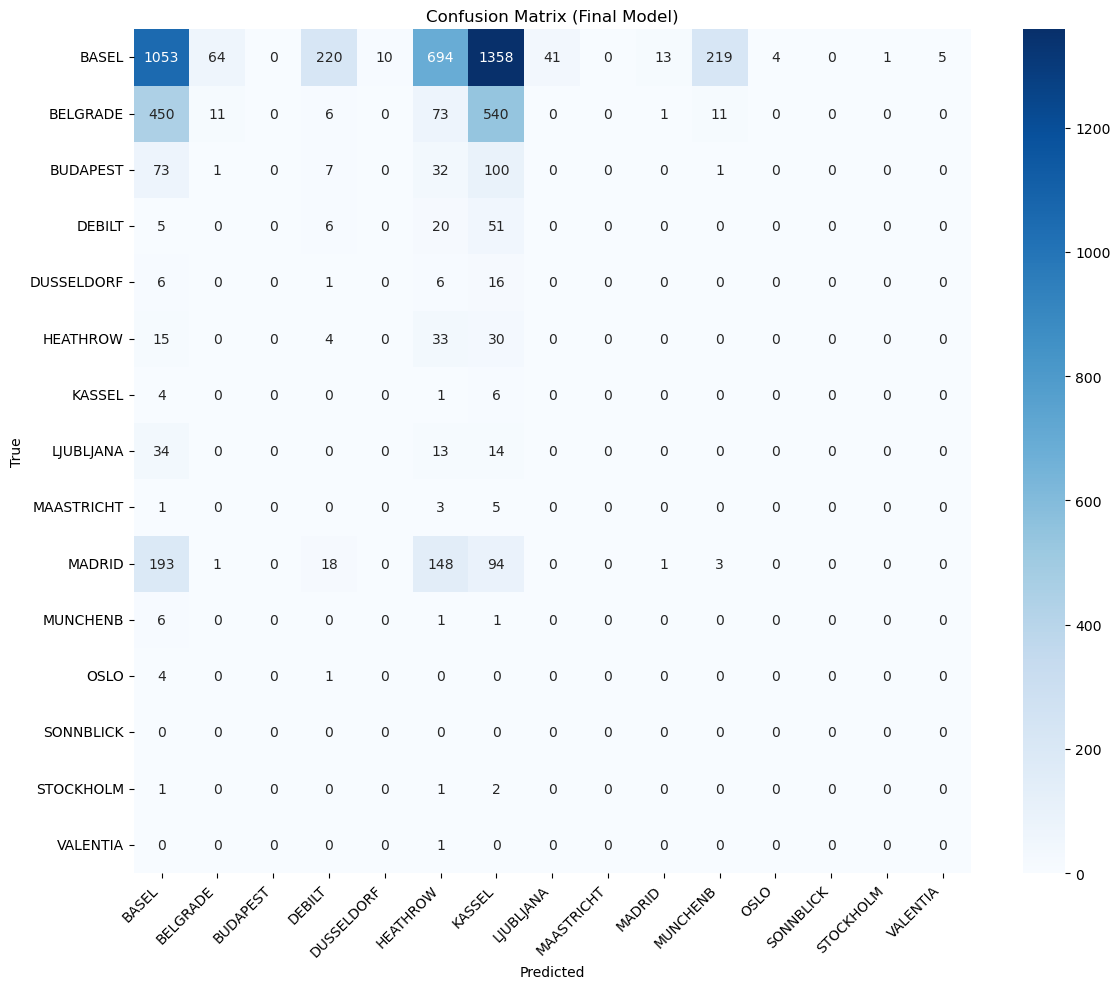

In [369]:
# Plot and show confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    
    # Create confusion matrix DataFrame
    cm_df = pd.crosstab(pd.Series(y_true, name='True'),
                        pd.Series(y_pred, name='Predicted'),
                        dropna=False)

    # Ensure all stations appear as rows/cols even if missing
    cm_df = cm_df.reindex(index=stations.values(), columns=stations.values(), fill_value=0)

    # Plot heatmap
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)

    ax.set_title(title)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()

    plt.show() 
    return fig

# Convert one-hot to labels
y_true_labels = get_station_labels(y_test)
y_pred_labels = get_station_labels(model.predict(X_test))

# Plot confusion matrix (avoid double plotting)
_ = plot_confusion_matrix(y_true_labels, y_pred_labels, "Confusion Matrix (Final Model)")

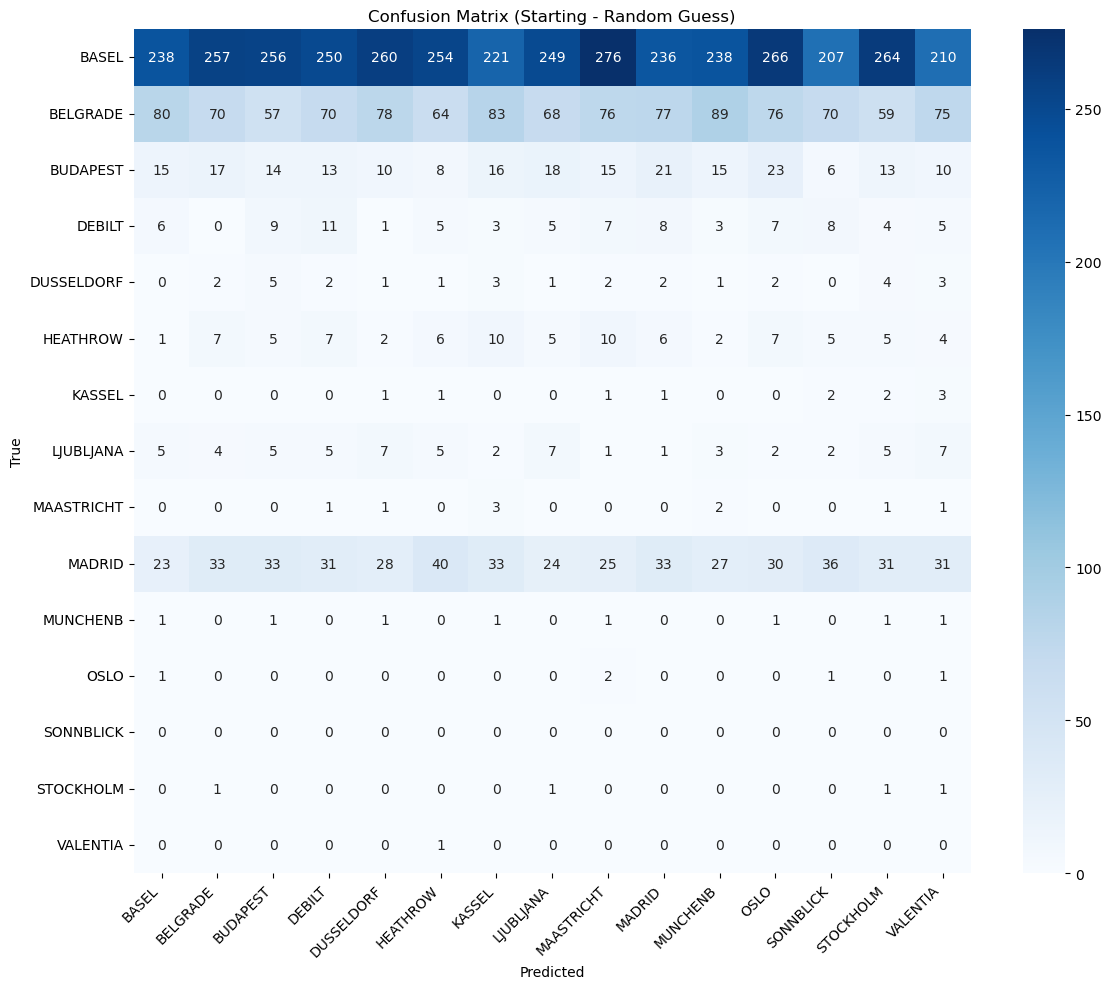

In [370]:
# Simulate random predictions for starting confusion matrix
random_indices = np.random.choice(list(stations.keys()), size=len(y_test))
y_pred_start_labels = [stations[i] for i in random_indices]

# Plot starting confusion matrix (avoid double plotting)
_ = plot_confusion_matrix(y_true_labels, y_pred_start_labels, "Confusion Matrix (Starting - Random Guess)")

In [371]:
# Check if the model recognises all 15 stations 
predicted_stations = set(y_pred_labels)
all_stations = set(stations.values())

if all_stations.issubset(predicted_stations):
    print("The model recognized all 15 stations.")
else:
    missing = all_stations - predicted_stations
    print(f"The model did NOT recognize all stations. Missing: {missing}")

The model did NOT recognize all stations. Missing: {'BUDAPEST', 'SONNBLICK', 'MAASTRICHT'}


In [372]:
from sklearn.metrics import accuracy_score

# Calculate model accuracy
# Convert true and predicted labels back to class indices
true_indices = np.argmax(y_test, axis=1)
pred_indices = np.argmax(model.predict(X_test), axis=1)

# Calculate accuracy
accuracy = accuracy_score(true_indices, pred_indices)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step
Model Accuracy: 19.34%


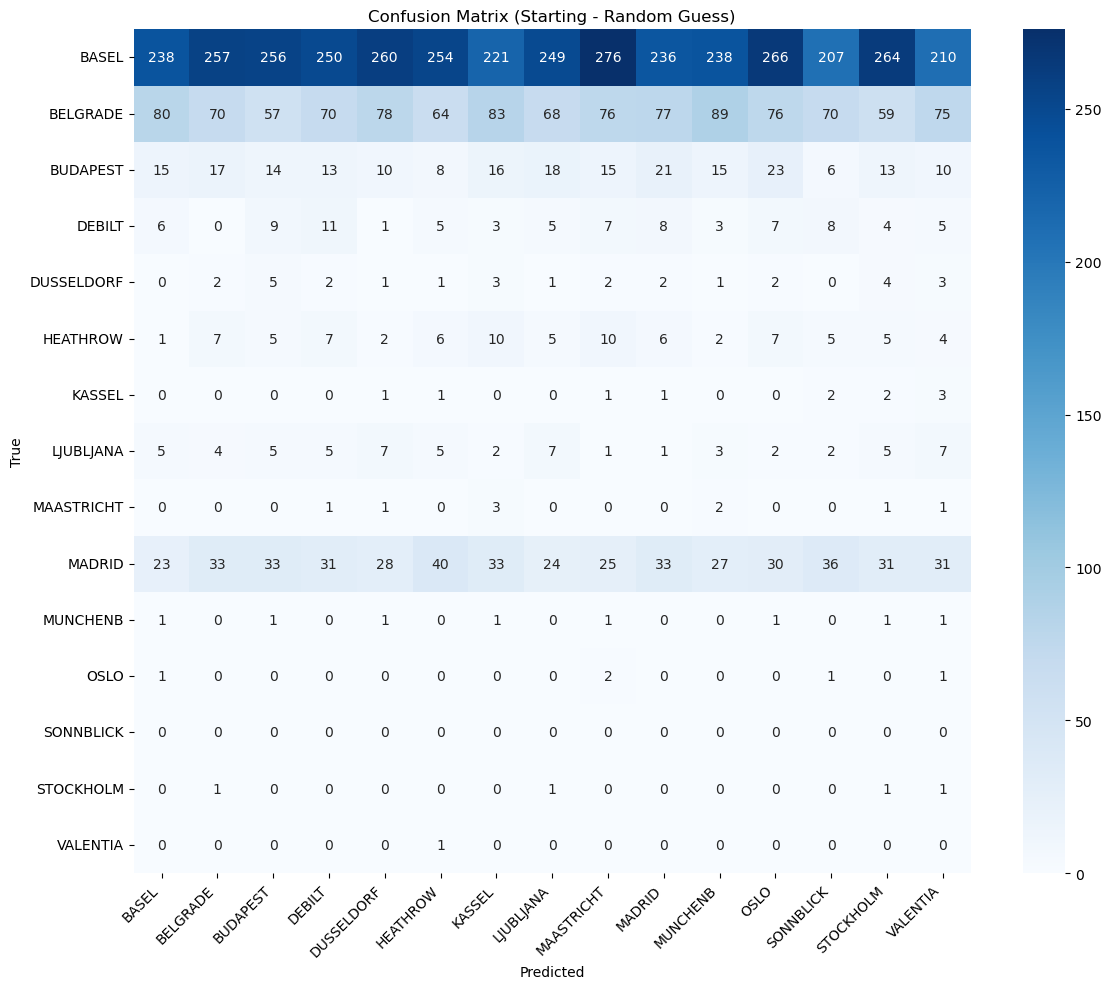

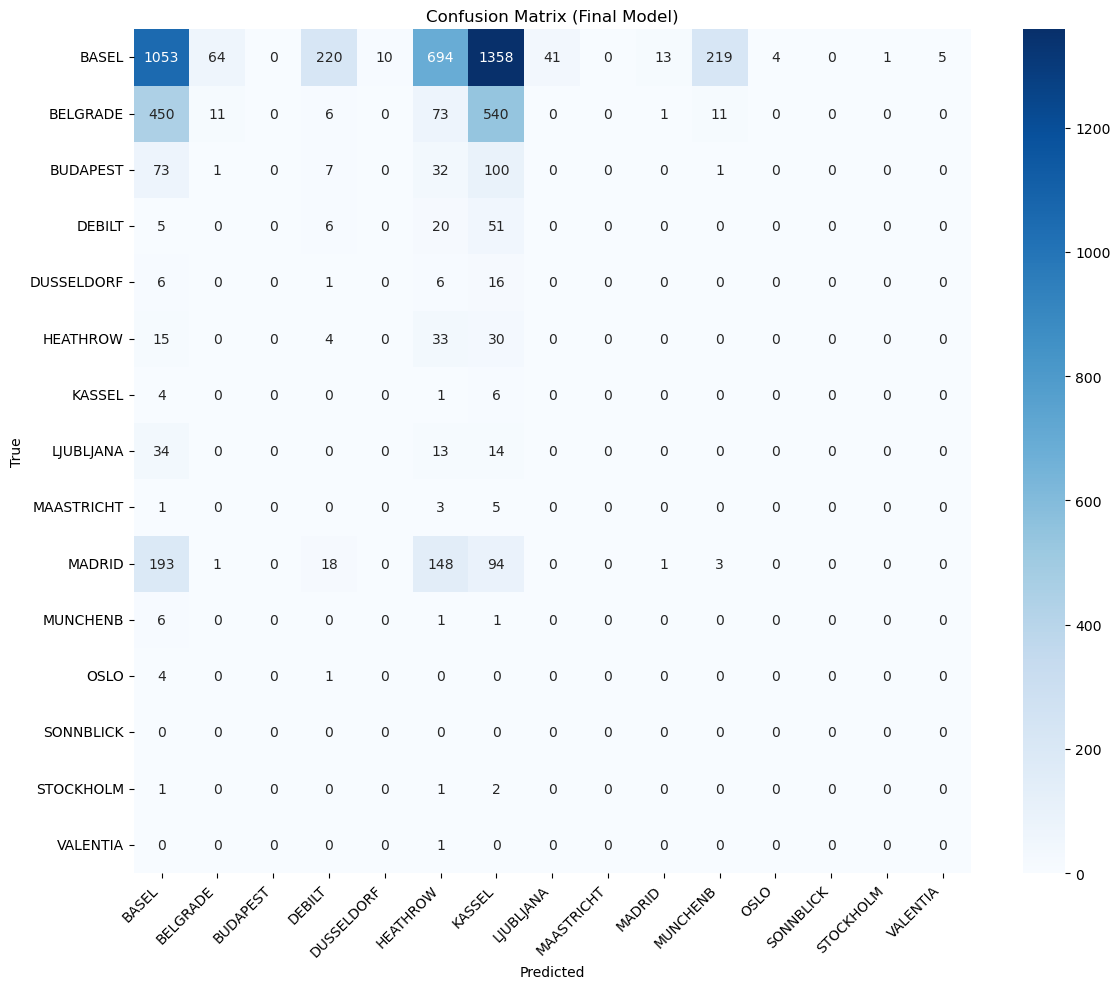

📝 Saved both confusion matrices to 'confusion_matrices_trial3.pdf'


In [373]:
from matplotlib.backends.backend_pdf import PdfPages

# Generate both figures again (avoid double plotting)
fig_start = plot_confusion_matrix(y_true_labels, y_pred_start_labels, "Confusion Matrix (Starting - Random Guess)")
fig_final = plot_confusion_matrix(y_true_labels, y_pred_labels, "Confusion Matrix (Final Model)")

# Save to a new PDF file for this trial
with PdfPages("confusion_matrices_trial3.pdf") as pdf:
    pdf.savefig(fig_start)
    pdf.savefig(fig_final)

print("📝 Saved both confusion matrices to 'confusion_matrices_trial3.pdf'")